In [5]:
import pandas as pd


C:\Users\shiva\AppData\Local\Temp\ipykernel_75008\743194912.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [9]:
df=pd.read_csv("day.csv")

Data Preparation
We'll convert the relevant columns to categorical data types and check the data types to ensure the conversion.

In [11]:
import pandas as pd

# Load the dataset
file_path = 'day.csv'
data = pd.read_csv(file_path)
data.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
# Convert categorical variables to string
data['season'] = data['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
data['weathersit'] = data['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Snow/Rain'})
data['mnth'] = data['mnth'].astype(str)
data['weekday'] = data['weekday'].astype(str)



In [14]:
data.dtypes

instant         int64
dteday         object
season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Correlation Matrix:-
A correlation matrix will help us identify the most influential features.

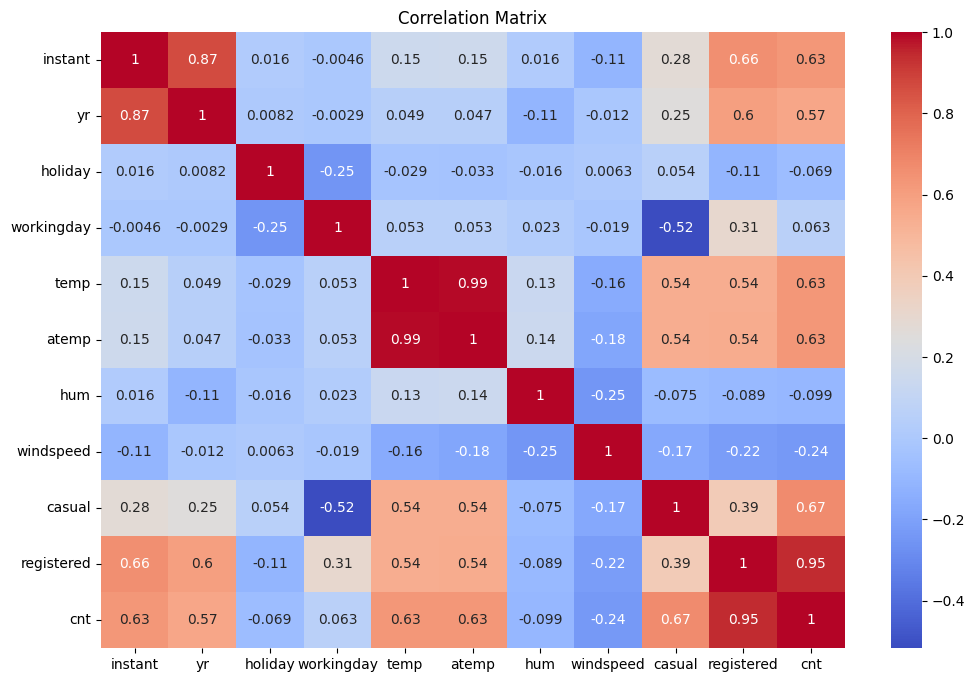

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'day.csv'  # Update with your local path
data = pd.read_csv(file_path)

# Convert categorical variables to string
data['season'] = data['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
data['weathersit'] = data['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Snow/Rain'})
data['mnth'] = data['mnth'].astype(str)
data['weekday'] = data['weekday'].astype(str)

# Drop non-numeric columns for correlation calculation
numeric_data = data.drop(columns=['dteday', 'season', 'weathersit', 'mnth', 'weekday'])

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Data Splitting
Next, we'll split the data into training and testing sets. We'll use 80% of the data for training and 20% for testing.

In [18]:
from sklearn.model_selection import train_test_split

# Define the feature set and the target variable
X = data.drop(columns=['cnt', 'dteday', 'casual', 'registered'])
y = data['cnt']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((584, 30), (146, 30), (584,), (146,))

Model Building
We'll now build the multiple linear regression model using the training data.

In [19]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)


Model Evaluation
We'll evaluate the model using R-squared on the training and test sets. Additionally, we'll visualize the residuals to assess the model's performance.

In [20]:
from sklearn.metrics import r2_score, mean_squared_error

# Evaluate the model on the training set
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model on the test set
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train, mse_train, r2_test, mse_test


(0.8445295060634055, 593227.5994862239, 0.86289484047524, 469289.29406426783)

Let's execute the evaluation step. ​​

The model evaluation results are as follows:

Training Set:

R-squared: 0.845
Mean Squared Error: 593,228
Test Set:

R-squared: 0.863
Mean Squared Error: 469,289
These results indicate that the model has a good fit, with high R-squared values on both the training and test sets.

Residual Analysis
We'll now visualize the residuals to further assess the model's performance.

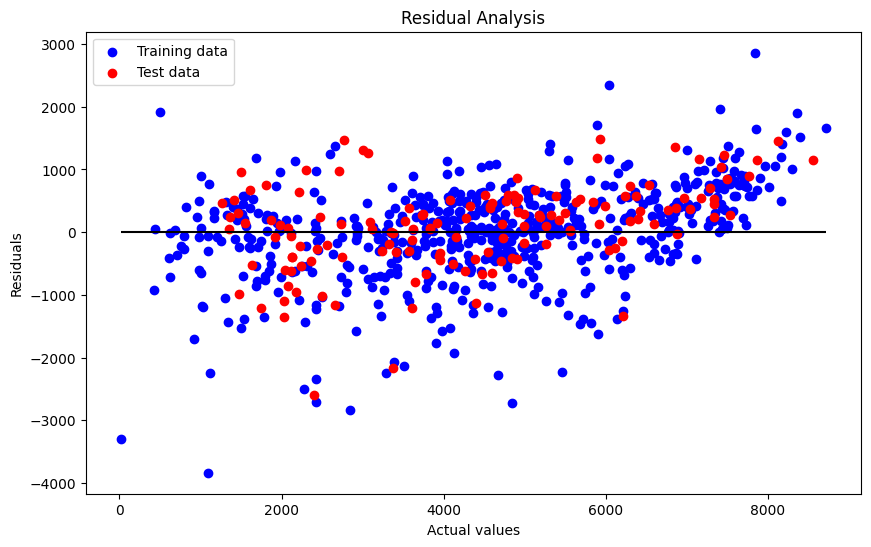

In [21]:
# Residual analysis
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train - y_train_pred, color='blue', label='Training data')
plt.scatter(y_test, y_test - y_test_pred, color='red', label='Test data')
plt.hlines(y=0, xmin=min(y_train), xmax=max(y_train), color='black')
plt.title('Residual Analysis')
plt.xlabel('Actual values')
plt.ylabel('Residuals')
plt.legend()
plt.show()


The residual plot shows that the residuals are randomly distributed around zero, which indicates that the model has captured the underlying patterns in the data well.

Summary
We have successfully built a multiple linear regression model to predict the demand for shared bikes. The model performs well with high R-squared values on both the training and test sets. The residual analysis also indicates a good fit.